In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
%cd"/content/drive/MyDrive/Anh"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Anh',target_size=(32,32), batch_size=32, class_mode='categorical')

Found 79 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'Anh_khac': 0, 'Anh_nhat': 1}

In [ ]:
x_train,y_train=next(training_set)
x_train=x_train.reshape(32,3072)
x_train=x_train.astype ('float32')

In [ ]:
# Tạo ra mạng ANN để train mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 3072 tín hiệu vào và có 4 tín hiệu ra sử dụng hàm relu
model.add(Dense(4,activation='relu',input_shape=(3072,)))
# Tạo lớp ẩn thứ hai với 4 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ ba với 50 tín hiệu vào và có 50 tín hiệu ra sử dụng hàm relu
model.add(Dense(50,activation='relu'))
# Tạo lớp ẩn thứ tư với 50 tín hiệu vào, 2 tín hiệu ra ra sử dụng hàm softmax
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12292     
                                                                 
 dense_5 (Dense)             (None, 50)                250       
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 2)                 102       
                                                                 
Total params: 15,194
Trainable params: 15,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 1000 lần học (epochs), mỗi lần học thì chỉ học␣20 dữ liệu (batch_size), khi sai số không thay đổi trong 200 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=1000, batch_size=20,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=200)])

Epoch 1/1000
2/2 [==============================] - 1s 197ms/step - loss: 0.6596 - accuracy: 0.7600 - val_loss: 0.7106 - val_accuracy: 0.7143
Epoch 2/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.5908 - accuracy: 0.7600 - val_loss: 0.6218 - val_accuracy: 0.7143
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.5265 - accuracy: 0.7600 - val_loss: 0.5989 - val_accuracy: 0.7143
Epoch 4/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.5076 - accuracy: 0.7600 - val_loss: 0.5953 - val_accuracy: 0.7143
Epoch 5/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.4901 - accuracy: 0.7600 - val_loss: 0.6129 - val_accuracy: 0.7143
Epoch 6/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.4695 - accuracy: 0.7600 - val_loss: 0.5625 - val_accuracy: 0.7143
Epoch 7/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.4243 - accuracy: 0.7600 - val_loss: 0.5666 - val_accuracy: 0.7143
Epoch 8/1000

In [ ]:
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.185682475566864
Train Accuracy 0.96875


In [ ]:
model.save("ANN_Face1.h5")
model_ANN=load_model('ANN_Face1.h5')

CO NHAT


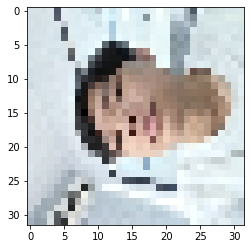

In [ ]:
img=load_img('/content/drive/MyDrive/Test/20220514_091113.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,3072)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="KHONG CO NHAT"
if result==1:
  prediction="CO NHAT"
print(prediction)

KHONG CO NHAT


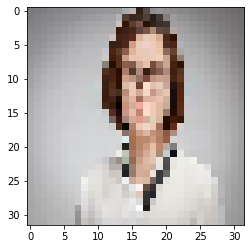

In [ ]:
img=load_img('/content/drive/MyDrive/Test/th (1).jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,3072)
img=img.astype('float32')
img=img/255
result=np.argmax(model_ANN.predict(img),axis=1)
if result==0:
  prediction="KHONG CO NHAT"
if result==1:
  prediction="CO NHAT"
print(prediction)